# PCA and Clustering
## Principal Component Analysis is widely used to highlight essential patterns of big datasets. In high dimensional data sometimes it is difficult for researchers to extract interesting features, so one way to solve it is to reduce its dimensionality at the expense of losing information. This tecnique enables to create new uncorrelated variables $Y_i$ (named as PCA) through linear combinations of original variables $X_k$ (in general correlated).

$Y_i = \alpha_1X_1 + \alpha_2X_2 + \ldots + \alpha_jX_j$

## These principal components collect all the information linked to the original variables. The goal of the analysis is to select some components able to preserving as much data variance as possible.

## Let's consider the datset crimtab: Data of 3000 male criminals over 20 years old undergoing their sentences in the chief prisons of England and Wales.
### Data of 3000 male criminals over 20 years old undergoing their sentences in the chief prisons of England and Wales. The 42 row names (“9.4″, 9.5” …) correspond to midpoints of intervals of finger lengths whereas the 22 column names (“142.24”, “144.78”…) correspond to (body) heights of 3000 criminals



In [8]:
#help(crimtab)
data("crimtab") #load data
head(crimtab) #show sample data
dim(crimtab) #check dimensions


    142.24 144.78 147.32 149.86 152.4 154.94 157.48 160.02 162.56 165.1 167.64
9.4      0      0      0      0     0      0      0      0      0     0      0
9.5      0      0      0      0     0      1      0      0      0     0      0
9.6      0      0      0      0     0      0      0      0      0     0      0
9.7      0      0      0      0     0      0      0      0      0     0      0
9.8      0      0      0      0     0      0      1      0      0     0      0
9.9      0      0      1      0     1      0      1      0      0     0      0
    170.18 172.72 175.26 177.8 180.34 182.88 185.42 187.96 190.5 193.04 195.58
9.4      0      0      0     0      0      0      0      0     0      0      0
9.5      0      0      0     0      0      0      0      0     0      0      0
9.6      0      0      0     0      0      0      0      0     0      0      0
9.7      0      0      0     0      0      0      0      0     0      0      0
9.8      0      0      0     0      0      0      0 

[1] 42 22

In [5]:
str(crimtab) #show structure of the data
sum(crimtab) 
colnames(crimtab)
apply(crimtab,2,var) #check the variance accross the variables


 'table' int [1:42, 1:22] 0 0 0 0 0 0 1 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:42] "9.4" "9.5" "9.6" "9.7" ...
  ..$ : chr [1:22] "142.24" "144.78" "147.32" "149.86" ...


[1] 3000

[1] "142.24" "144.78" "147.32" "149.86" "152.4"  "154.94" "157.48" "160.02"
 [9] "162.56" "165.1"  "167.64" "170.18" "172.72" "175.26" "177.8"  "180.34"
[17] "182.88" "185.42" "187.96" "190.5"  "193.04" "195.58"

142.24       144.78       147.32       149.86        152.4       154.94 
  0.02380952   0.02380952   0.17421603   0.88792102   2.56445993  11.19860627 
      157.48       160.02       162.56        165.1       167.64       170.18 
 38.04471545 107.76596980 205.79616725 270.58536585 238.42973287 187.60569106 
      172.72       175.26        177.8       180.34       182.88       185.42 
 79.57491289  42.85540070  12.51161440   3.74680604   0.68583043   0.19105691 
      187.96        190.5       193.04       195.58 
  0.08826945   0.00000000   0.00000000   0.02380952

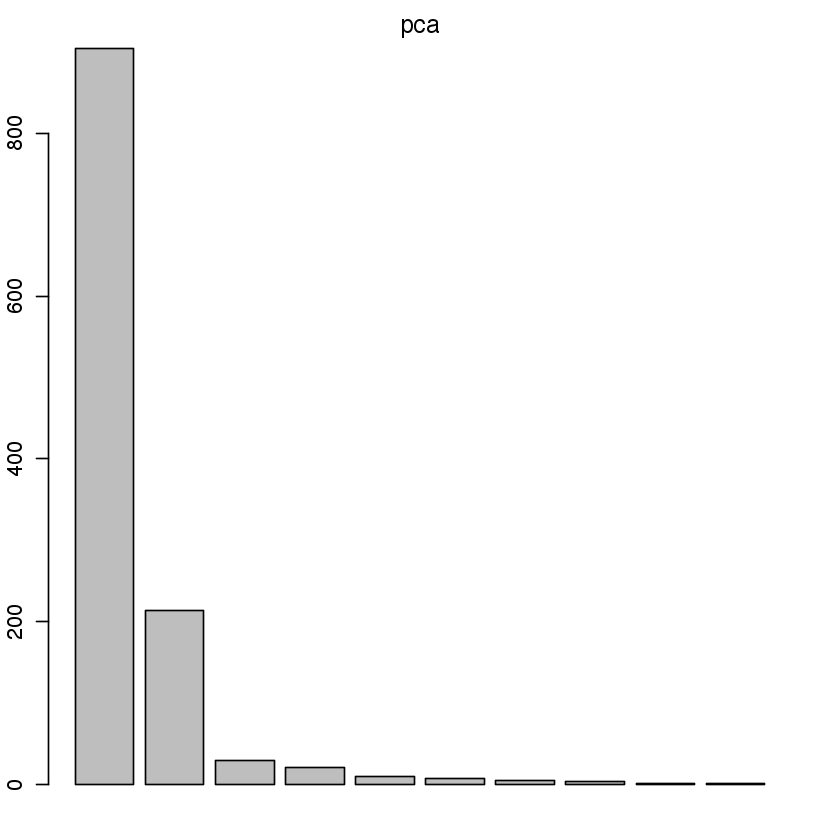

In [6]:
pca =prcomp(crimtab) #applying principal component analysis on crimtab data
par(mar = rep(2, 4)) #plot to show variable importance
plot(pca) 


Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”

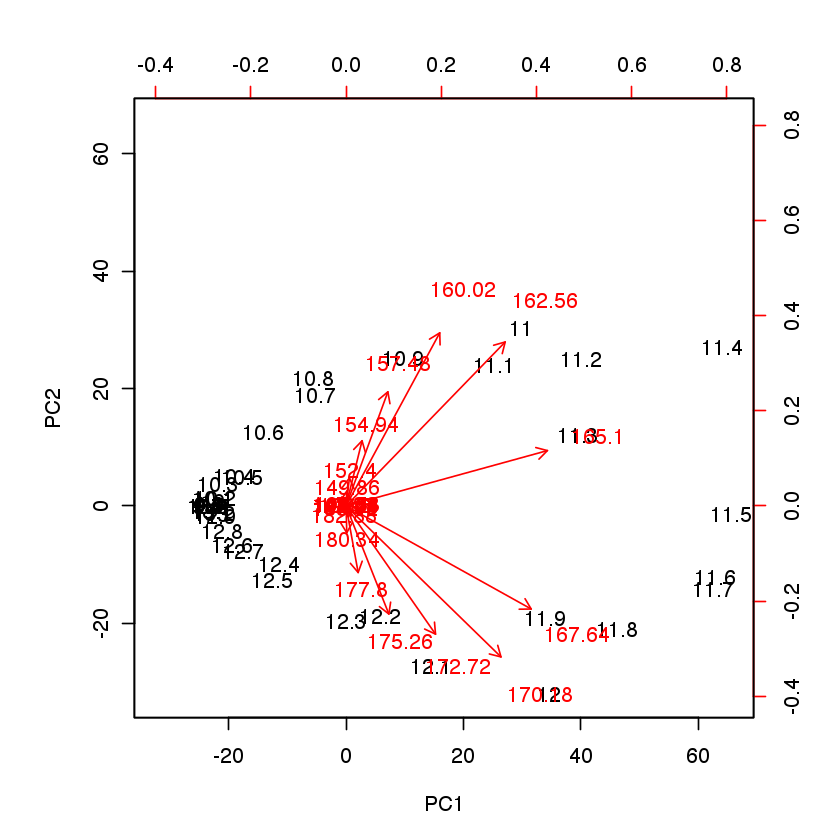

In [9]:
#'below code changes the directions of the biplot, if we donot include
#the below two lines the plot will be mirror image to the below one.'
pca$rotation=-pca$rotation
pca$x=-pca$x
biplot (pca , scale =0) #plot pca components using biplot in r

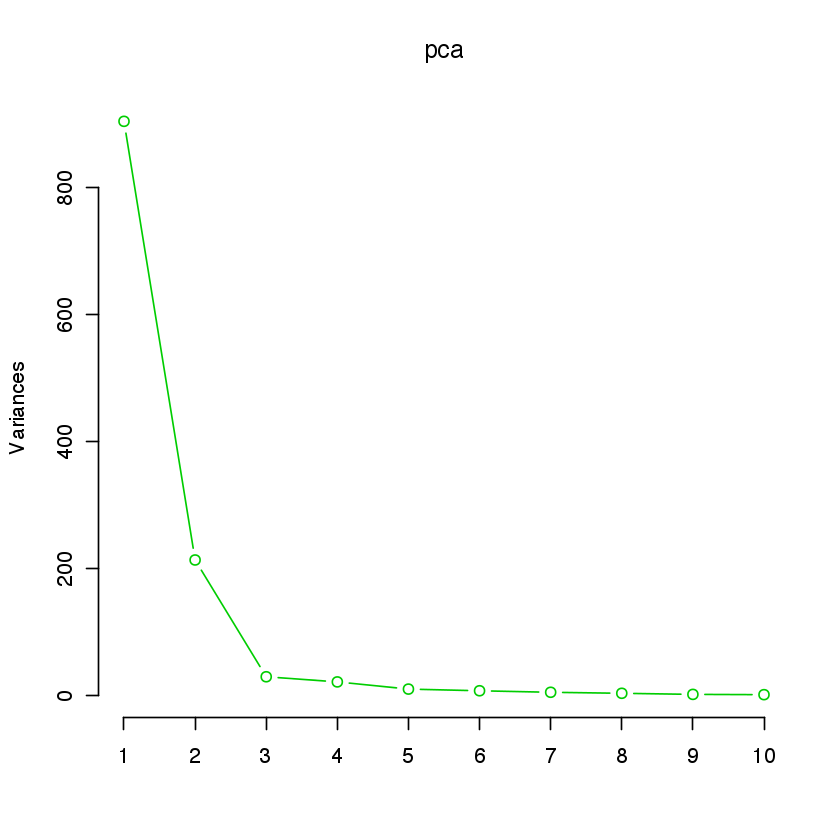

In [10]:
#In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot, which we can do in R using the “screeplot()” function:


#plot of variance of each PCA.
#It will be useful to decide how many principal components should be retained.
screeplot(pca, type="lines",col=3)


In [11]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
142.24,-0.0006121303,9.156788e-05,-0.0019577283,0.002856530,-0.0009242447,0.002241331,-0.004280071,0.000168420,-0.0088695080,0.0005808089,⋯,-0.057534661,0.100443694,-0.106567297,0.0386832146,-0.1056103144,0.888049039,-0.3128837663,-0.263925020,0,0
144.78,-0.0005879745,4.169480e-04,0.0012002251,0.001636190,-0.0037931852,0.001118855,-0.001736598,-0.009774703,-0.0001403618,0.0098652824,⋯,0.091224986,-0.117908184,-0.140089817,-0.0205969569,0.0157770151,0.153675238,0.8393573931,-0.472066022,0,0
147.32,-0.0030844186,3.473453e-03,-0.0001248908,0.007220064,-0.0088989402,0.014683787,-0.005618164,-0.025425210,-0.0378486292,0.0951706872,⋯,0.279366582,-0.315105266,0.845572599,-0.0432995776,0.0509425785,0.089755326,-0.0431450259,-0.115805466,0,0
149.86,0.0017997040,3.864560e-02,0.0787410517,0.007682542,-0.0440578190,0.046074816,-0.057902346,-0.006461596,-0.0499716326,0.1263025898,⋯,0.348418076,-0.460683939,-0.462131430,-0.0046104578,-0.0073084429,-0.012004309,-0.1173267468,0.210788729,0,0
152.4,0.0088970077,7.359450e-02,0.0913280319,-0.050622635,-0.0124927609,0.109833857,0.073319913,-0.228866287,0.0248853493,0.5711181562,⋯,-0.366713316,0.440272797,0.076271976,0.0171035998,-0.0075305704,-0.092023668,0.0636358074,-0.022556502,0,0
154.94,0.0419931347,1.711996e-01,0.2266316297,-0.062580845,-0.1342714074,0.232588078,-0.091354959,0.230958537,-0.2146446090,0.6303320428,⋯,0.125862940,-0.173889514,-0.044326577,-0.0059995994,0.0155284162,0.039056302,-0.0407607664,-0.048507165,0,0
157.48,0.1098671176,2.997420e-01,0.4467051773,-0.057284754,-0.1514378361,0.198164011,-0.179223803,0.407180592,-0.3974034183,-0.3469142043,⋯,-0.186824613,0.119783444,0.070146806,-0.0009666235,-0.0089935488,-0.019709477,0.0523221192,0.022411424,0,0
160.02,0.2461147443,4.546623e-01,0.4460722514,-0.172131270,-0.2530588590,-0.228109761,0.189373647,-0.430665936,0.3477223668,-0.1309461167,⋯,0.074603899,-0.061116117,0.003663896,-0.0114599741,0.0124194071,0.020417919,-0.0213164490,-0.013210677,0,0
162.56,0.4180115878,4.307201e-01,-0.2570367902,-0.205719464,0.6993091621,-0.006161225,0.115820019,0.034619644,-0.1265704563,0.0445029486,⋯,0.018183541,-0.046243748,-0.021052076,0.0140500038,-0.0057173052,0.006672980,0.0003313941,0.014770201,0,0
165.1,0.5288796994,1.454501e-01,-0.5611065195,0.061286597,-0.5700383337,-0.017555743,-0.086800466,0.180939291,0.0714662080,0.0277382672,⋯,-0.003878819,0.060676776,0.004526977,-0.0096260136,-0.0092411386,-0.015294205,0.0024626897,-0.006429909,0,0


IRIS DATASET PCA analysis


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

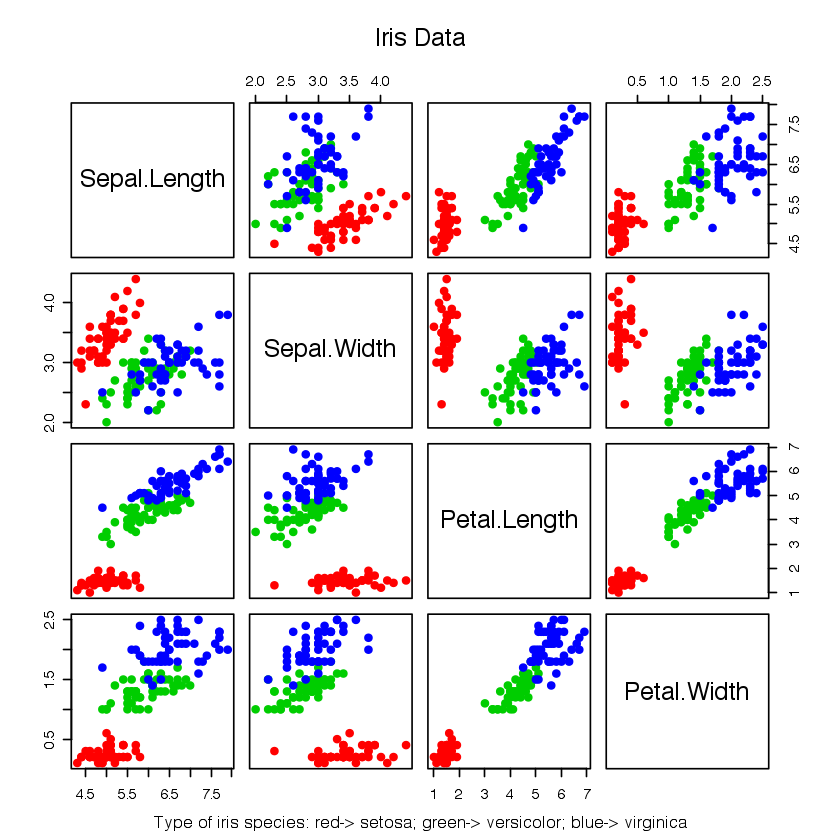

In [12]:
data(iris)
str(iris); summary(iris[1:4])
pairs(iris[1:4],main="Iris Data", pch=19, col=as.numeric(iris$Species)+1)
mtext("Type of iris species: red-> setosa; green-> versicolor; blue-> virginica", 1, line=3.7,cex=.8)


In [13]:
#To examine variability of all numeric variables
sapply(iris[1:4],var)
range(sapply(iris[1:4],var))
# maybe this range of variability is big in this context.
#Thus, we will use the correlation matrix
#For this, we must standardize our variables with scale() function:
iris.stand <- as.data.frame(scale(iris[,1:4]))
sapply(iris.stand,sd) #now, standard deviations are 1


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.6856935    0.1899794    3.1162779    0.5810063

[1] 0.1899794 3.1162779

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

In [14]:
#If we use prcomp() function, we indicate 'scale=TRUE' to use correlation matrix
pca <- prcomp(iris.stand,scale=T)
#it is just the same that: prcomp(iris[,1:4],scale=T) and prcomp(iris.stand)
#similar with princomp(): princomp(iris.stand, cor=T)
pca
summary(pca)
#This gives us the standard deviation of each component, and the proportion of variance explained by each component.
#The standard deviation is stored in (see 'str(pca)'):
pca$sdev

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Importance of components%s:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

[1] 1.7083611 0.9560494 0.3830886 0.1439265

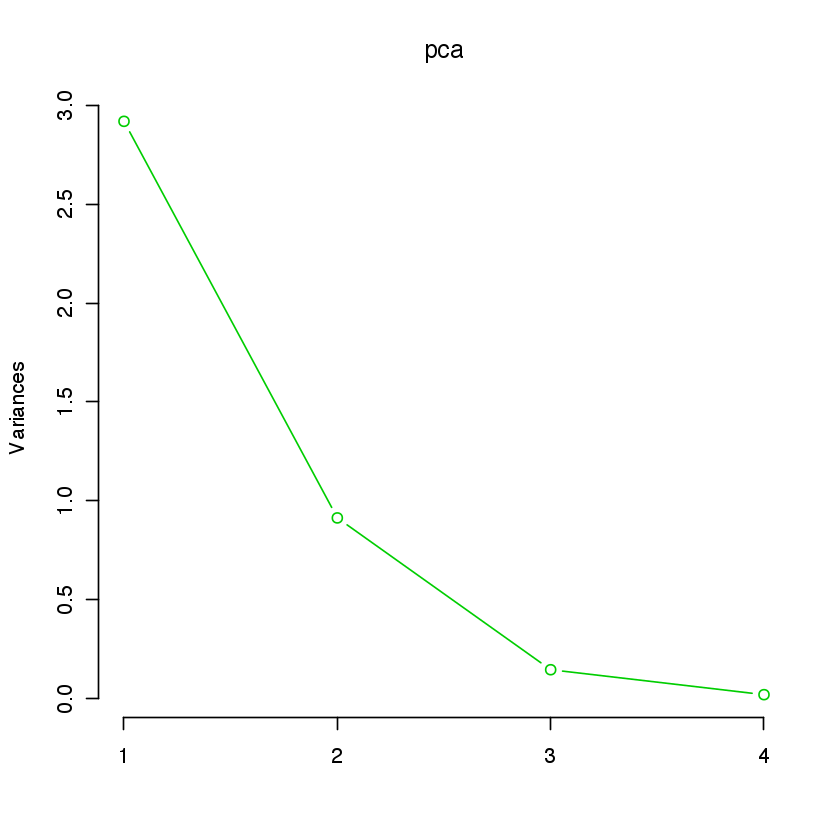

In [15]:
#plot of variance of each PCA.
#It will be useful to decide how many principal components should be retained.
screeplot(pca, type="lines",col=3)


In [16]:
#The loadings for the principal components are stored in:
pca$rotation # with princomp(): pca$loadings


,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


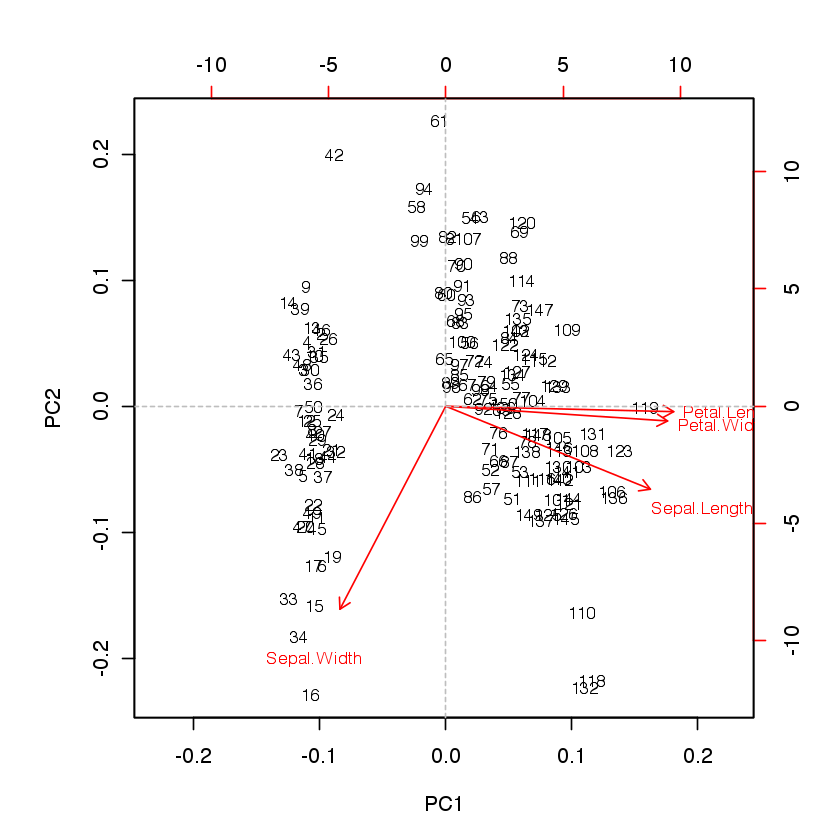

In [17]:
#biplot of first two principal components
biplot(pca,cex=0.8)
abline(h = 0, v = 0, lty = 2, col = 8)


You may also be interested in doing some unsupervised clustering. 
There are a bunch of ways to do this. 
In this case we have a "correct" clustering - the three species in the data set - so we can see how close to correct we are. Here's the popular k-means method:



In [19]:

set.seed(42)
cl <- kmeans(iris[,1:4],3)
iris$cluster <- as.factor(cl$cluster)
with(iris, table(cluster, Species))



       Species
cluster setosa versicolor virginica
      1      0         48        14
      2      0          2        36
      3     50          0         0

So k-means got all the setosa's perfectly but made some mistakes with the other two species, picking far too many flowers for its cluster 1.

You may want to do some sort of hierarchical clustering. Here's one way. (See also the Quick-R page on clustering.)



The "ward" method has been renamed to "ward.D"; note new "ward.D2"


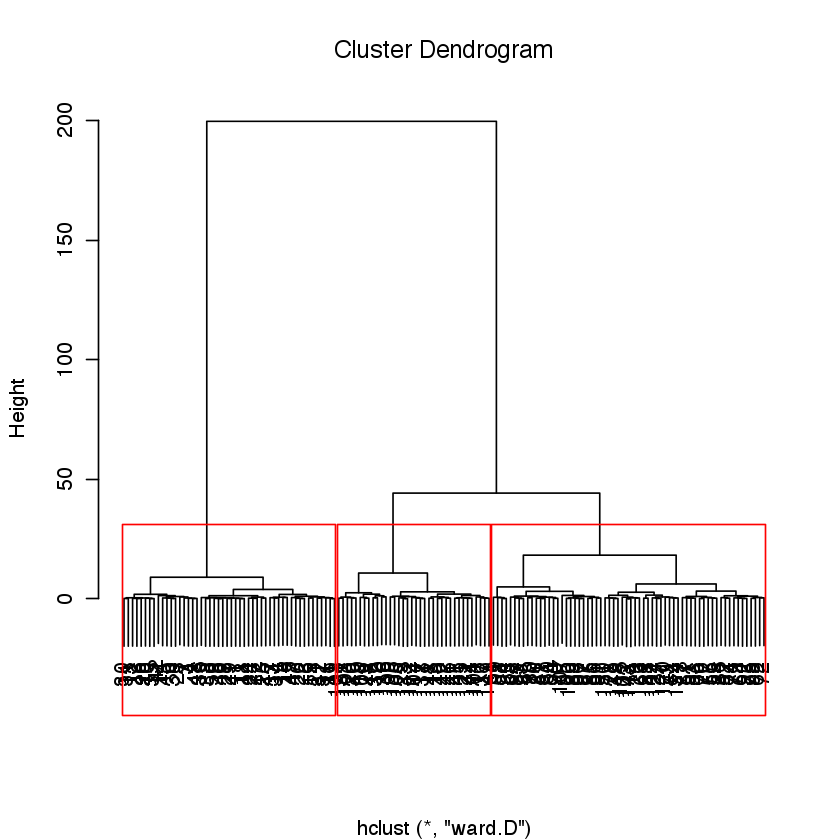

In [20]:
di <- dist(iris[,1:4], method="euclidean")
tree <- hclust(di, method="ward")
iris$hcluster <- as.factor((cutree(tree, k=3)-2) %% 3 +1)
# that modulo business just makes the coming table look nicer
plot(tree, xlab="")
rect.hclust(tree, k=3, border="red")


In [21]:
with(iris, table(hcluster, Species))


        Species
hcluster setosa versicolor virginica
       1      0         50        14
       2      0          0        36
       3     50          0         0